In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#there are total 13 features
#exited is the target column

we have to predict whether customer in the bank will be exiting or not

In [2]:
#importing the dataset
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.shape

(10000, 14)

#### Data preprocessing

In [4]:
#we will be using independent features from CreditScore to Estimated salary 
#Exited will be the target variable

In [5]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [6]:
#create dummy variables
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
#concatenate the dataframes
X = pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
#drop unnecessary columns
X = X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
#splitting the dataset into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [11]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### to create an ANN

In [12]:
#import keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
# from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout
#here tensorflow will be used as a backend
#tensorflow is an open source platform for machine learning, it can be used to create and deploy
# various types of machine learning models for different applications such as computer vision, nlp, 
# recommender system and more.

In [13]:
#initialising the ANN
classifier = Sequential() #this is an empty neural network

In [14]:
#adding the first input layer and first hidden layer
# classifier.add(Dense(output_dim = 6, init = "he_uniform", activation = "relu", input_dim = 11))
#now output_dim has changed to units, init changed to kernel_initializer
classifier.add(Dense(units = 10, kernel_initializer = "he_normal", activation = "relu", input_dim = 11)) 
#here we are giving input_dim as 11 because we are using 11 features as an input
#adding a dropout layer
classifier.add(Dropout(0.3)) #while creating deep neural network with some ratio

In [15]:
#adding the second hidden layer
classifier.add(Dense(units = 20, kernel_initializer = "he_normal", activation = "relu"))
classifier.add(Dropout(0.4))

In [16]:
#adding the third hidden layer
classifier.add(Dense(units = 15, kernel_initializer = "he_normal", activation = "relu"))
classifier.add(Dropout(0.2))

In [17]:
#adding the ouput layer
classifier.add(Dense(units = 1, kernel_initializer = "glorot_uniform", activation = "sigmoid")) 
#as this is a binary classification we need only one output neuron that is units=1

#### all hidden layers must have relu of leaky relu activation functions

#### relu prevents vanishing gradient problem

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                315       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [19]:
#compiling the ANN
classifier.compile(optimizer= "adam",loss= "binary_crossentropy", metrics= ['accuracy'])

In [20]:
%%time
#fitting the ANN to the training set
# model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size= 10, nb_epoch = 100)
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size= 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 5s 5ms/step - loss: 0.6129 - accuracy: 0.7371 - val_loss: 0.4930 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5151 - accuracy: 0.7895 - val_loss: 0.4758 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4954 - accuracy: 0.7925 - val_loss: 0.4649 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4816 - accuracy: 0.7964 - val_loss: 0.4520 - val_accuracy: 0.7963
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4674 - accuracy: 0.7968 - val_loss: 0.4457 - val_accuracy: 0.7982
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4572 - accuracy: 0.8009 - val_loss: 0.4387 - val_accuracy: 0.7974
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4540 - accuracy: 0.7974 - val_loss: 0.4382 - val_accuracy: 0.7986

Epoch 58/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3730 - accuracy: 0.8455 - val_loss: 0.3789 - val_accuracy: 0.8315
Epoch 59/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3753 - accuracy: 0.8434 - val_loss: 0.3780 - val_accuracy: 0.8338
Epoch 60/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3806 - accuracy: 0.8401 - val_loss: 0.3812 - val_accuracy: 0.8311
Epoch 61/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3765 - accuracy: 0.8425 - val_loss: 0.3835 - val_accuracy: 0.8228
Epoch 62/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3792 - accuracy: 0.8408 - val_loss: 0.3848 - val_accuracy: 0.8164
Epoch 63/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3797 - accuracy: 0.8470 - val_loss: 0.3792 - val_accuracy: 0.8277
Epoch 64/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3829 - accuracy: 0.8391 - val_loss: 0.3789 - val_accuracy:

In [21]:
#Prediction on the test data
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [22]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [24]:
cm

array([[1582,   13],
       [ 273,  132]], dtype=int64)

In [25]:
#before using dropout the accuracy was around 86% 
#use dropout only if there huge data and we have to create a deep neural network.

In [26]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [27]:
score

0.857

##### the training, validation and test accuracy are almost same

In [29]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


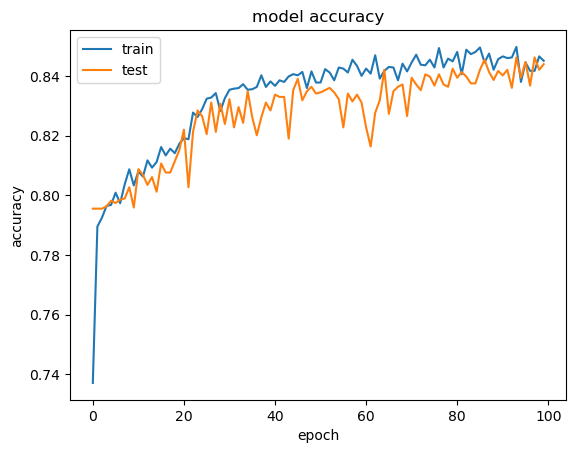

In [35]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'], loc= 'upper left')
plt.show()

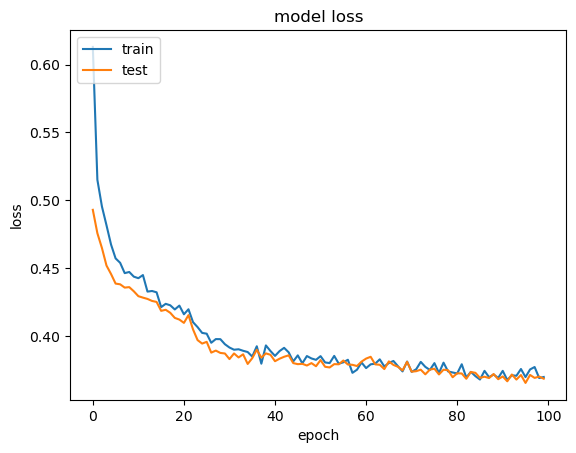

In [37]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'], loc= 'upper left')
plt.show()